# La Rovere Francesco - Physics Of Data - 2164968

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


colors = ['#21918c', '#b5367a', '#d55e00', '#4b5d67', '#b58900']

In [2]:
class AnalysisCSV:

   def __init__(self, fileName, N = 10):
      
      self.dDF = pd.read_csv(fileName['Data'])
      self.rDF = pd.read_csv(fileName['Rewards'])

      #To compute survival probability
      self.rDF['NotCrashed'] = ~self.rDF['Crashed']

      self.grDF = self.rDF.groupby(self.rDF.index // N).mean()

In [3]:
manualFiles = {
   'Data': 'Data/ManualControlActions.csv',
   'Rewards': 'Data/ManualControlRewards.csv'
}

baselineFiles = {
   'Data': f'Data/BaselineControlActions.csv',
   'Rewards': f'Data/BaselineControlRewards.csv'
}

DQNFiles = {
   'Data': f'Data/BaselineControlActions.csv',
   'Rewards': f'Data/DQN_agentControlRewards.csv'
}

PPOFiles = {
   'Data': f'Data/BaselineControlActions.csv',
   'Rewards': f'Data/PPO_agentControlRewards.csv'
}

#ManualControl = AnalysisCSV(manualFiles)
Baseline = AnalysisCSV(baselineFiles, N = 40)
Manual = AnalysisCSV(manualFiles, N = 20)
DQN = AnalysisCSV(DQNFiles, N = 40)
PPO = AnalysisCSV(PPOFiles, N = 30)

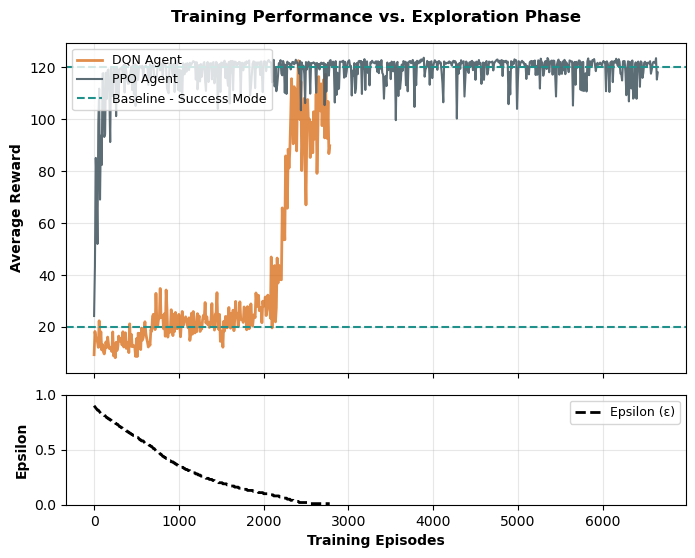

In [5]:
tDF = pd.read_csv('DQN/DDQNTrainingData.csv')
ppoDF = pd.read_csv('PPO/PPOtrainingData.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.1) 

episodes = tDF['Episode'] 

# Plot DQN

ax1.plot(episodes, tDF['Avg Reward'], color='#d55e00', alpha = 0.7, linewidth=2, label='DQN Agent')

# Plot PPO
ax1.plot(ppoDF['Episode'], ppoDF['Avg Reward'], color='#4b5d67', alpha=0.9, label = 'PPO Agent')

# Plot Baseline
ax1.axhline(120, color='#21918c', linestyle='--', linewidth=1.5, label='Baseline - Success Mode')
ax1.axhline(20, color='#21918c', linestyle='--', linewidth=1.5)

ax1.set_ylabel('Average Reward', fontweight='bold')
ax1.set_title('Training Performance vs. Exploration Phase', fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# BOTTOM PLOT
ax2.plot(episodes, tDF['Eps'], color='black', linestyle='--', linewidth=2, label='Epsilon (\u03B5)')

ax2.set_xlabel('Training Episodes', fontweight='bold')
ax2.set_ylabel('Epsilon', fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)

# Save as PDF for your LaTeX document
# plt.savefig('Training_Dynamics_Stacked.pdf', format='pdf', bbox_inches='tight', dpi=300)

plt.show()

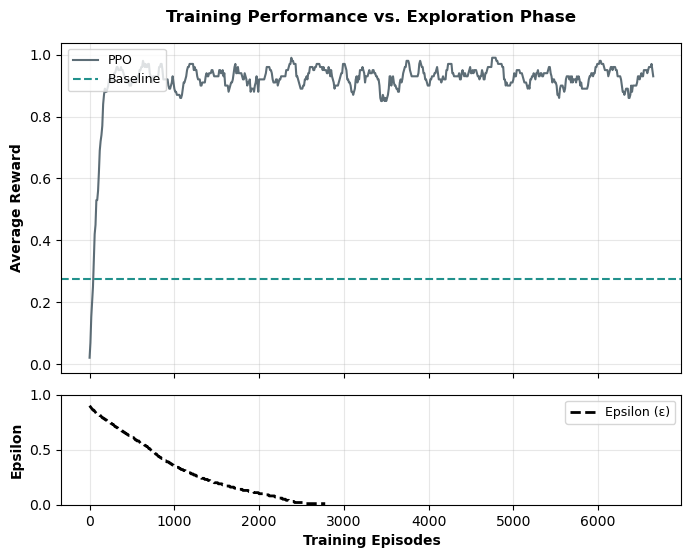

In [7]:
#tDF = pd.read_csv('DQN/DDQNTrainingData.csv')
ppoDF = pd.read_csv('PPO/PPOtrainingData.csv')

SR_baseline = (Baseline.rDF['NotCrashed'].mean(), Baseline.rDF['Crashed'].std()/len(Baseline.rDF))


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.1) 

episodes = tDF['Episode'] 

# Plot DQN
#ax1.plot(episodes, tDF['SuccessRate'], color='#d55e00', alpha = 0.7, linewidth=2, label='DQN')

# Plot PPO
ax1.plot(ppoDF['Episode'], ppoDF['SuccessRate'], color='#4b5d67', alpha=0.9, label = 'PPO')

# Plot Baseline
ax1.axhline(SR_baseline[0], color='#21918c', linestyle='--', linewidth=1.5, label='Baseline')

ax1.set_ylabel('Average Reward', fontweight='bold')
ax1.set_title('Training Performance vs. Exploration Phase', fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# BOTTOM PLOT
ax2.plot(episodes, tDF['Eps'], color='black', linestyle='--', linewidth=2, label='Epsilon (\u03B5)')

ax2.set_xlabel('Training Episodes', fontweight='bold')
ax2.set_ylabel('Epsilon', fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)

# Save as PDF for your LaTeX document
# plt.savefig('Training_Dynamics_Stacked.pdf', format='pdf', bbox_inches='tight', dpi=300)

plt.show()

Text(0, 0.5, 'Survival probability')

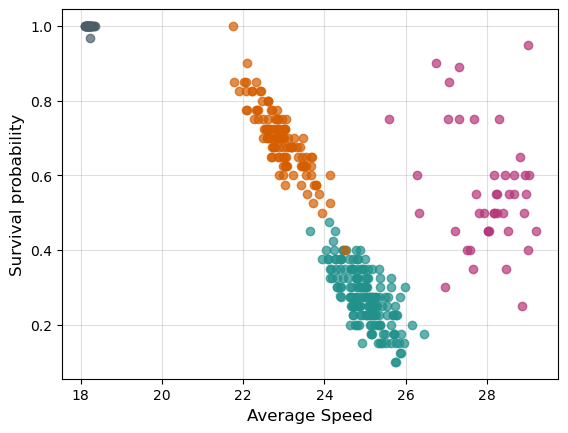

In [9]:
plt.scatter(Baseline.grDF['AvgSpeed'], Baseline.grDF['NotCrashed'], 
            label = 'Baseline agent', alpha=0.7,
            zorder = 100, color = '#21918c')

plt.scatter(Manual.grDF['AvgSpeed'], Manual.grDF['NotCrashed'], 
            label = 'Manual agent', alpha=0.7,
            zorder = 100, color = '#b5367a')

plt.scatter(DQN.grDF['AvgSpeed'], DQN.grDF['NotCrashed'], 
            label = 'DQN agent', alpha=0.7,
            zorder = 100, color = '#d55e00')

plt.scatter(PPO.grDF['AvgSpeed'], PPO.grDF['NotCrashed'], 
            label = 'PPO agent', alpha=0.7,
            zorder = 100, color = '#4b5d67')



plt.grid(True, alpha = 0.4)

plt.xlabel("Average Speed", fontsize = 12)
plt.ylabel("Survival probability", fontsize = 12)

#plt.legend(fontsize = 12, loc = 'lower left')

#plt.savefig("SpeedVsSurvRate.pdf")

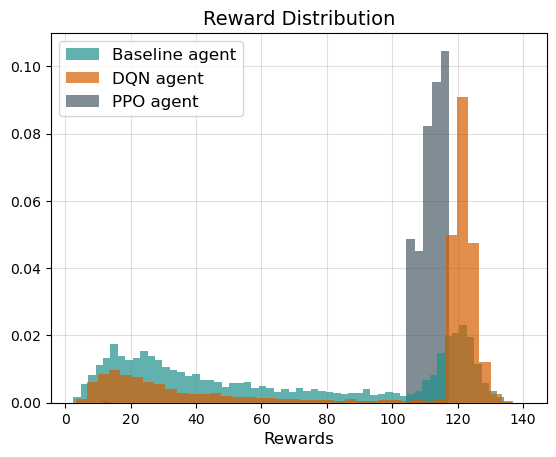

In [13]:
plt.hist(Baseline.rDF['Rewards'], density = True, 
         label = 'Baseline agent', bins = 60,
         alpha = 0.7,
         zorder = 100, color='#21918c')

# plt.hist(Manual.rDF['Rewards'], density = True, 
#          label = 'Manual agent', bins = 30,
#          alpha = 0.7,
#          zorder = 100, color='#b5367a')

plt.hist(DQN.rDF['Rewards'], density = True, 
         label = 'DQN agent', bins = 40,
         alpha = 0.7,
         zorder = 100, color='#d55e00')

plt.hist(PPO.rDF['Rewards'], density = True, 
         label = 'PPO agent', bins = 40,
         alpha = 0.7,
         zorder = 10, color='#4b5d67')

plt.grid(True, alpha = 0.4)
plt.xlabel("Rewards", fontsize = 12)
plt.title("Reward Distribution", fontsize = 14)

plt.legend(fontsize = 12)

#plt.savefig("RewardDist.pdf")
plt.show()

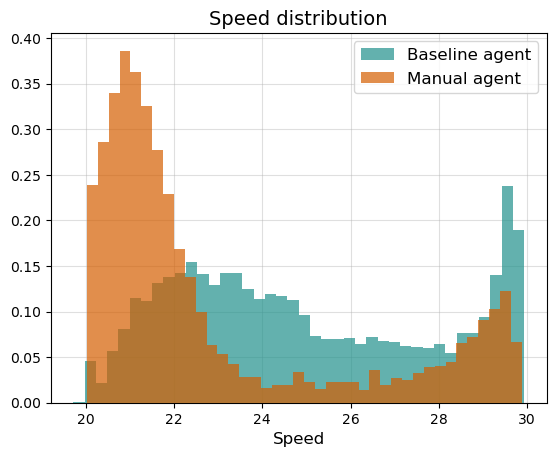

In [40]:
plt.hist(Baseline.rDF['AvgSpeed'], label = 'Baseline agent', density = True,
         zorder = 100, alpha = 0.7, bins = 40,
         color = '#21918c')
# plt.hist(Manual.rDF['AvgSpeed'], label = 'Manual agent', density = True,
#          zorder = 100, alpha = 0.7, color = '#b5367a')

plt.hist(DQN.rDF['AvgSpeed'], label = 'Manual agent', density = True, bins = 40,
         zorder = 100, alpha = 0.7, color = '#d55e00')

plt.grid(True, alpha = 0.4)
plt.xlabel("Speed", fontsize = 12)
plt.title("Speed distribution", fontsize = 14)

plt.legend(fontsize = 12)
#plt.savefig("SpeedDist.pdf")

plt.show()